# TW4 EDA on Airlines Delay Data

#### Write full names of your team members who worked together.




#### Submission:

- Push the completed code to your Github repository.

- See more information in Canvas. 

Trivikram Peddiraju
Shivaram Muppidi

#### We will conduct basic EDA on airlines delays datasets.

- Conduct basic preprocessing

- Apply EDA on chosen data


#### Airlines delay datasets

- Flight delay explanatory data analysis using airlines delay datasets

https://www.kaggle.com/giovamata/airlinedelaycauses

- EDA examples:

https://www.kaggle.com/adveros/flight-delay-eda-exploratory-data-analysis

- a complete report of airlines delay can be found in Canvas Week 4. 

### Part 0:
    
- Examples below are the EDA for airlines delays 2020 data

- Run through the code and check preprocessing and some tools of EDA. 

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('./data/airtrans_2020_Jan.csv') 
# if there are any missing values, then fill in with NaN
data = data.fillna(np.nan)
data.head()

,flight_date,unique_carrier,flight_num,origin,dest,dep_delay,arr_delay,cancelled,actual_elapsed_time,distance,carrier_delay,weather_delay,late_aircraft_dealy
0,1/1/20,WN,5888,ONT,SFO,41.0,68.0,0,122.0,363,8.0,0.0,33.0
1,1/1/20,WN,6276,ONT,SFO,-4.0,-2.0,0,92.0,363,NaN,NaN,NaN
2,1/1/20,WN,4598,ONT,SJC,-4.0,-6.0,0,68.0,333,NaN,NaN,NaN
3,1/1/20,WN,4761,ONT,SJC,10.0,10.0,0,75.0,333,NaN,NaN,NaN
4,1/1/20,WN,5162,ONT,SJC,1.0,-12.0,0,67.0,333,NaN,NaN,NaN


#### Python lambda

- see the examples of lambda

https://www.w3schools.com/python/python_lambda.asp

In [3]:
# add a new column with 'delayed' as key with values either True or False
data['delayed'] = data['arr_delay'].apply(lambda x: x > 0) 

data.head()

,flight_date,unique_carrier,flight_num,origin,dest,dep_delay,arr_delay,cancelled,actual_elapsed_time,distance,carrier_delay,weather_delay,late_aircraft_dealy,delayed
0,1/1/20,WN,5888,ONT,SFO,41.0,68.0,0,122.0,363,8.0,0.0,33.0,True
1,1/1/20,WN,6276,ONT,SFO,-4.0,-2.0,0,92.0,363,NaN,NaN,NaN,False
2,1/1/20,WN,4598,ONT,SJC,-4.0,-6.0,0,68.0,333,NaN,NaN,NaN,False
3,1/1/20,WN,4761,ONT,SJC,10.0,10.0,0,75.0,333,NaN,NaN,NaN,True
4,1/1/20,WN,5162,ONT,SJC,1.0,-12.0,0,67.0,333,NaN,NaN,NaN,False


In [4]:
# create a new DataFrame containing only delayed flights
delayed_flights = data[data['delayed'] == True]

delayed_flights.head()

,flight_date,unique_carrier,flight_num,origin,dest,dep_delay,arr_delay,cancelled,actual_elapsed_time,distance,carrier_delay,weather_delay,late_aircraft_dealy,delayed
0,1/1/20,WN,5888,ONT,SFO,41.0,68.0,0,122.0,363,8.0,0.0,33.0,True
3,1/1/20,WN,4761,ONT,SJC,10.0,10.0,0,75.0,333,NaN,NaN,NaN,True
5,1/1/20,WN,5684,ONT,SJC,2.0,7.0,0,80.0,333,NaN,NaN,NaN,True
7,1/1/20,WN,1679,ONT,SMF,59.0,47.0,0,73.0,390,0.0,0.0,40.0,True
8,1/1/20,WN,3479,ONT,SMF,-5.0,10.0,0,100.0,390,NaN,NaN,NaN,True


In [5]:
# how many unique carriers that have delayed flights
delayed_flights['unique_carrier'].value_counts()

WN    24134
AA    22706
DL    18692
OO    18242
UA    12133
OH     9433
MQ     8944
AS     8062
YX     6838
B6     6603
YV     5698
NK     4589
9E     4300
F9     3117
EV     2975
G4     2788
HA     2371
Name: unique_carrier, dtype: int64

In [6]:
# retrieve flights with delayed information (False or True)
# group the data based on unique_carrier and count them.
delayed_by_carrier = data.groupby(['unique_carrier', 'delayed']).size().unstack()
delayed_by_carrier

delayed,False,True
unique_carrier,,
9E,18768,4300
AA,53570,22706
AS,13048,8062
B6,18106,6603
DL,61375,18692
EV,7589,2975
F9,9350,3117
G4,4986,2788
HA,4664,2371


In [7]:
# set default index (0, 1, 2, 3, ...)

delayed_by_carrier = delayed_by_carrier.reset_index()
delayed_by_carrier[:5]

delayed,unique_carrier,False,True
0,9E,18768,4300
1,AA,53570,22706
2,AS,13048,8062
3,B6,18106,6603
4,DL,61375,18692


In [8]:
# add a new column of the total flights
delayed_by_carrier['flight_count'] = delayed_by_carrier[False] + delayed_by_carrier[True]

# display top 5 rows
delayed_by_carrier[:5]

delayed,unique_carrier,False,True,flight_count
0,9E,18768,4300,23068
1,AA,53570,22706,76276
2,AS,13048,8062,21110
3,B6,18106,6603,24709
4,DL,61375,18692,80067


In [9]:
# calculate the ratio of delayed flights
delayed_by_carrier['proportion_delayed'] = delayed_by_carrier[True] / delayed_by_carrier['flight_count']

# display top 5 rows
delayed_by_carrier[:5]

delayed,unique_carrier,False,True,flight_count,proportion_delayed
0,9E,18768,4300,23068,0.186405
1,AA,53570,22706,76276,0.297682
2,AS,13048,8062,21110,0.381904
3,B6,18106,6603,24709,0.267231
4,DL,61375,18692,80067,0.233454


In [10]:
# sort the data
delayed_by_carrier.sort_values('proportion_delayed', ascending=False)

delayed,unique_carrier,False,True,flight_count,proportion_delayed
11,OH,14876,9433,24309,0.388046
2,AS,13048,8062,21110,0.381904
7,G4,4986,2788,7774,0.358631
9,MQ,17256,8944,26200,0.341374
8,HA,4664,2371,7035,0.337029
15,YV,12138,5698,17836,0.319466
1,AA,53570,22706,76276,0.297682
5,EV,7589,2975,10564,0.281617
3,B6,18106,6603,24709,0.267231
10,NK,12888,4589,17477,0.262574


### pivot_table()

- see examples of pivot_table()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [11]:
data.pivot_table(columns='unique_carrier', values='arr_delay')

unique_carrier,9E,AA,AS,B6,DL,EV,F9,G4,HA,MQ,NK,OH,OO,UA,WN,YV,YX
arr_delay,-6.155347,0.273081,1.594428,-3.00329,-4.418101,-0.436295,-4.48205,6.411197,-1.057733,3.953014,-1.570703,7.828951,1.265104,-2.796893,-5.587468,5.8516,-5.319191


In [12]:
# retrieve the information of arrival delay of South West 
southwest = data[data['unique_carrier'] == 'WN']['arr_delay']
southwest.head()

0    68.0
1    -2.0
2    -6.0
3    10.0
4   -12.0
Name: arr_delay, dtype: float64

In [13]:
southwest.describe()

count    107708.000000
mean         -5.587468
std          23.635321
min         -68.000000
25%         -17.000000
50%         -10.000000
75%          -1.000000
max         597.000000
Name: arr_delay, dtype: float64

count: there are 42,020 rows in the dataset, which is filtered to only show Southwest (WN).

mean: the average delay.
std: the standard deviation. More on this below.

min: the shortest delay in the dataset. In this case, the flight was very early.

25%: the 25th percentile. 25% of delays were lower than -9.00.

50%: the 50th percentile, or the median. 50% of delays were lower than 1.00.

75%: the 75th percentile. 75% of delays were lower than 19.00.

max: the longest delay in the dataset: 535.00.

In [14]:
wn_carrier = data[data['unique_carrier'] == 'WN']
wn_carrier['arr_delay'][:5]

0    68.0
1    -2.0
2    -6.0
3    10.0
4   -12.0
Name: arr_delay, dtype: float64

### Another way to plot box plots and histograms

<AxesSubplot:>

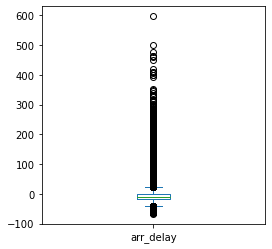

In [15]:
wn_carrier['arr_delay'].plot(kind='box', figsize=[4, 4])

<AxesSubplot:>

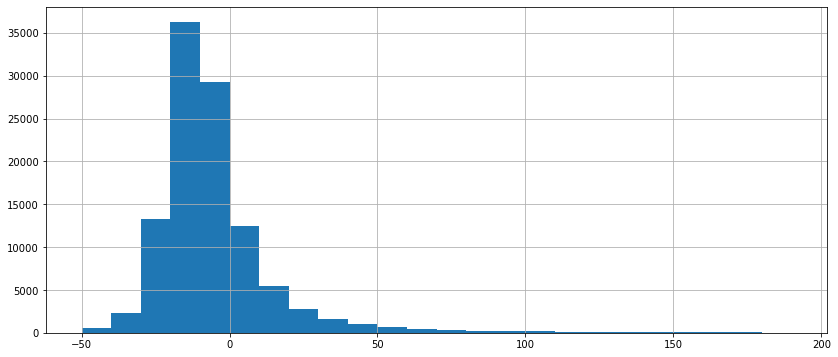

In [16]:
# histograms
bin_values = np.arange(start=-50, stop=200, step=10)
wn_carrier['arr_delay'].hist(bins=bin_values, figsize = [14, 6])

In [17]:
hi_volume = data['origin'].value_counts()[:20]
hi_volume.head()

ATL    32190
ORD    25661
DFW    24339
DEN    20398
CLT    19995
Name: origin, dtype: int64

In [18]:
hi_volume_airports_names = hi_volume.index.tolist()
hi_volume_airports_names

['ATL',
 'ORD',
 'DFW',
 'DEN',
 'CLT',
 'LAX',
 'PHX',
 'IAH',
 'LAS',
 'LGA',
 'SFO',
 'DTW',
 'MCO',
 'MSP',
 'BOS',
 'SEA',
 'DCA',
 'EWR',
 'JFK',
 'SLC']

## Part 1 Tasks

(1) Choose a dataset from the data repository of airlines delay. 

(2) Conduct EDA on the data. This includes descriptive statistics and data visualization as shown in the above cells. 

In [19]:
data.columns

Index(['flight_date', 'unique_carrier', 'flight_num', 'origin', 'dest',
       'dep_delay', 'arr_delay', 'cancelled', 'actual_elapsed_time',
       'distance', 'carrier_delay', 'weather_delay', 'late_aircraft_dealy',
       'delayed'],
      dtype='object')

In [20]:
data.head()


,flight_date,unique_carrier,flight_num,origin,dest,dep_delay,arr_delay,cancelled,actual_elapsed_time,distance,carrier_delay,weather_delay,late_aircraft_dealy,delayed
0,1/1/20,WN,5888,ONT,SFO,41.0,68.0,0,122.0,363,8.0,0.0,33.0,True
1,1/1/20,WN,6276,ONT,SFO,-4.0,-2.0,0,92.0,363,NaN,NaN,NaN,False
2,1/1/20,WN,4598,ONT,SJC,-4.0,-6.0,0,68.0,333,NaN,NaN,NaN,False
3,1/1/20,WN,4761,ONT,SJC,10.0,10.0,0,75.0,333,NaN,NaN,NaN,True
4,1/1/20,WN,5162,ONT,SJC,1.0,-12.0,0,67.0,333,NaN,NaN,NaN,False


In [21]:
data.describe()


,flight_num,dep_delay,arr_delay,cancelled,actual_elapsed_time,distance,carrier_delay,weather_delay,late_aircraft_dealy
count,607346.000000,600647.000000,599268.000000,607346.000000,599268.000000,607346.000000,82285.000000,82285.000000,82285.000000
mean,2622.365261,6.181221,-1.620799,0.011407,137.039345,798.022341,24.696324,4.594944,20.561658
std,1822.545302,43.181905,45.015546,0.106193,72.293510,587.282639,72.972359,39.180258,50.370818
min,1.000000,-58.000000,-96.000000,0.000000,18.000000,31.000000,0.000000,0.000000,0.000000
25%,1070.000000,-6.000000,-18.000000,0.000000,84.000000,369.000000,0.000000,0.000000,0.000000
50%,2177.000000,-3.000000,-10.000000,0.000000,120.000000,641.000000,1.000000,0.000000,0.000000
75%,4108.000000,2.000000,2.000000,0.000000,168.000000,1037.000000,22.000000,0.000000,22.000000
max,6860.000000,2489.000000,2536.000000,1.000000,744.000000,5095.000000,2489.000000,1525.000000,2228.000000


In [23]:
ont_sfo = data[data['delayed']==True]

In [24]:
ont_sfo = ont_sfo[(ont_sfo['origin']=="ONT")]
ont_sfo = ont_sfo[(ont_sfo['carrier_delay']!= 0) | (ont_sfo['weather_delay']!= 0) | (ont_sfo['late_aircraft_dealy']!= 0) ]

In [25]:
ont_sfo


,flight_date,unique_carrier,flight_num,origin,dest,dep_delay,arr_delay,cancelled,actual_elapsed_time,distance,carrier_delay,weather_delay,late_aircraft_dealy,delayed
0,1/1/20,WN,5888,ONT,SFO,41.0,68.0,0,122.0,363,8.0,0.0,33.0,True
3,1/1/20,WN,4761,ONT,SJC,10.0,10.0,0,75.0,333,NaN,NaN,NaN,True
5,1/1/20,WN,5684,ONT,SJC,2.0,7.0,0,80.0,333,NaN,NaN,NaN,True
7,1/1/20,WN,1679,ONT,SMF,59.0,47.0,0,73.0,390,0.0,0.0,40.0,True
8,1/1/20,WN,3479,ONT,SMF,-5.0,10.0,0,100.0,390,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603283,1/31/20,DL,3092,ONT,ATL,-9.0,1.0,0,257.0,1900,NaN,NaN,NaN,True
604999,1/31/20,AS,537,ONT,SEA,-12.0,13.0,0,190.0,956,NaN,NaN,NaN,True
605040,1/31/20,AS,619,ONT,SEA,-1.0,9.0,0,175.0,956,NaN,NaN,NaN,True
605852,1/31/20,AA,2797,ONT,DFW,-2.0,2.0,0,176.0,1188,NaN,NaN,NaN,True


array([[<AxesSubplot:title={'center':'flight_num'}>,
        <AxesSubplot:title={'center':'dep_delay'}>,
        <AxesSubplot:title={'center':'arr_delay'}>],
       [<AxesSubplot:title={'center':'cancelled'}>,
        <AxesSubplot:title={'center':'actual_elapsed_time'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'carrier_delay'}>,
        <AxesSubplot:title={'center':'weather_delay'}>,
        <AxesSubplot:title={'center':'late_aircraft_dealy'}>]],
      dtype=object)

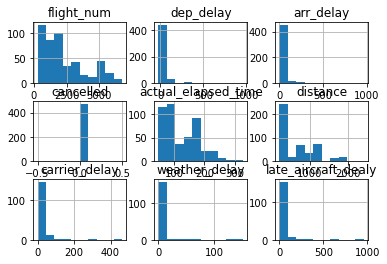

In [26]:
ont_sfo.hist()


<AxesSubplot:xlabel='arr_delay', ylabel='carrier_delay'>

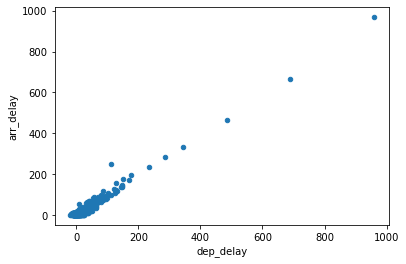

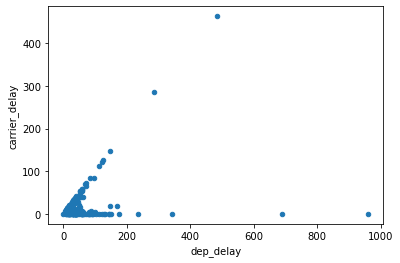

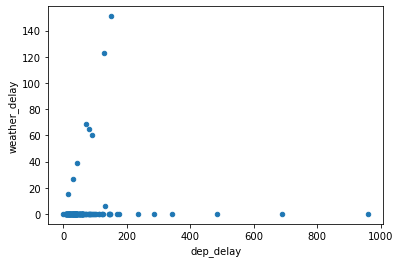

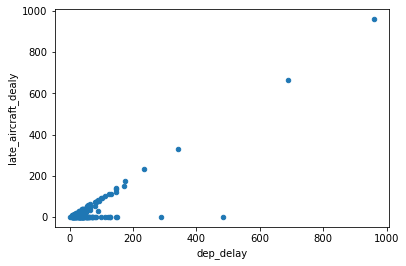

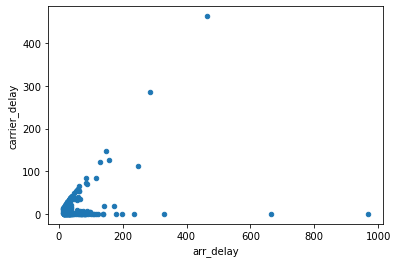

In [27]:
ont_sfo.plot.scatter(x='dep_delay', y='arr_delay')
ont_sfo.plot.scatter(x='dep_delay', y='carrier_delay')
ont_sfo.plot.scatter(x='dep_delay', y='weather_delay')
ont_sfo.plot.scatter(x='dep_delay', y='late_aircraft_dealy')
ont_sfo.plot.scatter(x='arr_delay', y='carrier_delay')

weather_delay           555.0
carrier_delay          3578.0
late_aircraft_dealy    5573.0
dtype: float64

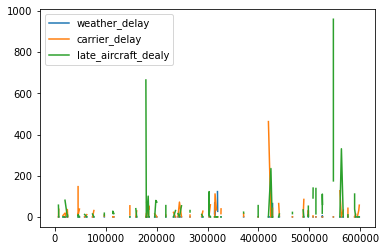

In [28]:
ont_sfo_specific = ont_sfo[['weather_delay','carrier_delay','late_aircraft_dealy']]
ont_sfo_specific.plot()
ont_sfo_specific.sum()

In [30]:
print("Maximum Delay respectvely")
print(ont_sfo_specific.max())
print("Min Delay occurence")
print(ont_sfo_specific.min())



Maximum Delay respectvely
weather_delay          151.0
carrier_delay          463.0
late_aircraft_dealy    960.0
dtype: float64
Min Delay occurence
weather_delay          0.0
carrier_delay          0.0
late_aircraft_dealy    0.0
dtype: float64


## Part 2

Write a summary of what you find from your data analysis. 

### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html